In [104]:
import pandas as pd
df = pd.read_sas('maize.sas7bdat')
df = df.fillna(0)

In [106]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Geno_Code'] = lb.fit_transform(df['Geno_Code'])

In [107]:
#df.drop(columns='Geno_Code', inplace = True)
X = df.drop(columns=['DtoA'])
y = df['DtoA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3984, 7392) (3984,)
Test (997, 7392) (997,)


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

from sklearn import linear_model
model =linear_model.Ridge(alpha=.5)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 353669753.859
MAE: 4.909
MAE: 2.755


In [116]:
for i in range((7)):
    # evaluation of a model using 10 features chosen with correlation
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error

    # feature selection
    def select_features(X_train, y_train, X_test):
        # configure to select a subset of features
        fs = SelectKBest(score_func=f_regression, k=(i+1)*1000)
        # learn relationship from training data
        fs.fit(X_train, y_train)
        # transform train input data
        X_train_fs = fs.transform(X_train)
        # transform test input data
        X_test_fs = fs.transform(X_test)
        return X_train_fs, X_test_fs, fs

    # load the dataset
    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
    # fit the model
    model = LinearRegression()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    print('MAE: %.3f' % mae)

    from sklearn import linear_model
    model =linear_model.Ridge(alpha=.5)
    model.fit(X_train_fs, y_train)
    yhat = model.predict(X_test_fs)
    mae = mean_absolute_error(y_test, yhat)
    print('MAE: %.3f' % mae)

    from sklearn import linear_model
    model = linear_model.Lasso(alpha=0.1)
    model.fit(X_train_fs, y_train)
    yhat = model.predict(X_test_fs)
    mae = mean_absolute_error(y_test, yhat)
    print('MAE: %.3f' % mae)

MAE: 32937.938
MAE: 3.104
MAE: 2.776
MAE: 828340.935
MAE: 3.612
MAE: 2.766
MAE: 828485.236
MAE: 3.964
MAE: 2.750
MAE: 54854131.594
MAE: 4.383
MAE: 2.754
MAE: 264201964.850
MAE: 4.923
MAE: 2.755
MAE: 19374673.191
MAE: 4.881
MAE: 2.755
MAE: 51737874.014
MAE: 4.870
MAE: 2.755


In [120]:
asd = [100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,'all']
for i in range(len(asd)):
    # evaluation of a model using 10 features chosen with correlation
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error

    # feature selection
    def select_features(X_train, y_train, X_test):
        # configure to select a subset of features
        fs = SelectKBest(score_func=f_regression, k=asd[i])
        # learn relationship from training data
        fs.fit(X_train, y_train)
        # transform train input data
        X_train_fs = fs.transform(X_train)
        # transform test input data
        X_test_fs = fs.transform(X_test)
        return X_train_fs, X_test_fs, fs

    # load the dataset
    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
    # fit the model
    model = LinearRegression()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    print('MAE: %.3f' % mae)

    from sklearn import linear_model
    model =linear_model.Ridge(alpha=.5)
    model.fit(X_train_fs, y_train)
    yhat = model.predict(X_test_fs)
    mae = mean_absolute_error(y_test, yhat)
    print('MAE: %.3f' % mae)

    from sklearn import linear_model
    model = linear_model.Lasso(alpha=0.1)
    model.fit(X_train_fs, y_train)
    yhat = model.predict(X_test_fs)
    mae = mean_absolute_error(y_test, yhat)
    print('MAE: %.3f' % mae)

MAE: 2.825
MAE: 2.824
MAE: 2.814
MAE: 2.855
MAE: 2.838
MAE: 2.790
MAE: 2.868
MAE: 2.840
MAE: 2.786
MAE: 2.932
MAE: 2.898
MAE: 2.785
MAE: 2.977
MAE: 2.935
MAE: 2.785
MAE: 3.039
MAE: 2.953
MAE: 2.785
MAE: 3.081
MAE: 2.974
MAE: 2.775
MAE: 3.138
MAE: 3.007
MAE: 2.776
MAE: 3.193
MAE: 3.051
MAE: 2.776
MAE: 32937.938
MAE: 3.104
MAE: 2.776
MAE: 828340.935
MAE: 3.612
MAE: 2.766
MAE: 828485.236
MAE: 3.964
MAE: 2.750
MAE: 54854131.594
MAE: 4.383
MAE: 2.754
MAE: 264201964.850
MAE: 4.923
MAE: 2.755
MAE: 19374673.191
MAE: 4.881
MAE: 2.755
MAE: 51737874.014
MAE: 4.870
MAE: 2.755
MAE: 353669753.859
MAE: 4.909
MAE: 2.755


In [121]:
asd = [100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,'all']
for i in range(len(asd)):
    # evaluation of a model using 10 features chosen with correlation
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error

    # feature selection
    def select_features(X_train, y_train, X_test):
        # configure to select a subset of features
        fs = SelectKBest(score_func=mutual_info_regression, k=asd[i])
        # learn relationship from training data
        fs.fit(X_train, y_train)
        # transform train input data
        X_train_fs = fs.transform(X_train)
        # transform test input data
        X_test_fs = fs.transform(X_test)
        return X_train_fs, X_test_fs, fs

    # load the dataset
    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
    # fit the model
    model = LinearRegression()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    print('MAE: %.3f' % mae)

    from sklearn import linear_model
    model =linear_model.Ridge(alpha=.5)
    model.fit(X_train_fs, y_train)
    yhat = model.predict(X_test_fs)
    mae = mean_absolute_error(y_test, yhat)
    print('MAE: %.3f' % mae)

    from sklearn import linear_model
    model = linear_model.Lasso(alpha=0.1)
    model.fit(X_train_fs, y_train)
    yhat = model.predict(X_test_fs)
    mae = mean_absolute_error(y_test, yhat)
    print('MAE: %.3f' % mae)

MAE: 2.794
MAE: 2.796
MAE: 2.796
MAE: 2.880
MAE: 2.848
MAE: 2.785
MAE: 2.951
MAE: 2.890
MAE: 2.780
MAE: 3.004
MAE: 2.931
MAE: 2.780
MAE: 3.067
MAE: 2.965
MAE: 2.776
MAE: 50961.184
MAE: 2.976
MAE: 2.777
MAE: 49886.315
MAE: 3.010
MAE: 2.778
MAE: 56918.244
MAE: 3.048
MAE: 2.778
MAE: 39391.825
MAE: 3.080
MAE: 2.776
MAE: 12517.689
MAE: 3.175
MAE: 2.776
MAE: 109250.256
MAE: 3.558
MAE: 2.759
MAE: 8937096.124
MAE: 3.953
MAE: 2.758
MAE: 4702390.106
MAE: 4.506
MAE: 2.760
MAE: 51892533.926
MAE: 4.926
MAE: 2.759
MAE: 6.072
MAE: 5.044
MAE: 2.757
MAE: 436718870.014
MAE: 5.071
MAE: 2.759
MAE: 353669753.859
MAE: 4.909
MAE: 2.755


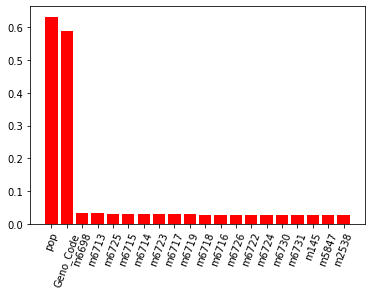

In [134]:
import matplotlib.pyplot as plt
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=600)
    # learn relationship from training data
    fit = fs.fit(X_train, y_train)
    indices = np.argsort(fit.scores_)[::-1]

    # To get your top 10 feature names
    features = []
    for i in range(20):
        features.append(X.columns[indices[i]])

    # Now plot
    plt.figure()
    plt.xticks(rotation=70)
    plt.bar(features, fit.scores_[indices[range(20)]], color='r', align='center')
    plt.show()
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


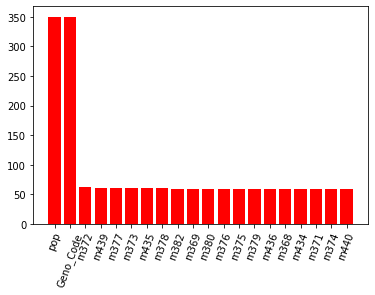

In [133]:
import matplotlib.pyplot as plt
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=600)
    # learn relationship from training data
    fit = fs.fit(X_train, y_train)
    indices = np.argsort(fit.scores_)[::-1]

    # To get your top 10 feature names
    features = []
    for i in range(20):
        features.append(X.columns[indices[i]])

    # Now plot
    plt.figure()
    plt.xticks(rotation=70)
    plt.bar(features, fit.scores_[indices[range(20)]], color='r', align='center')
    plt.show()
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
